In [12]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from keras.models import model_from_json

In [13]:
# load json and create model
json_file = open('ARCNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("ARCNN_weights_best.h5")
print("Loaded model from disk")

Loaded model from disk


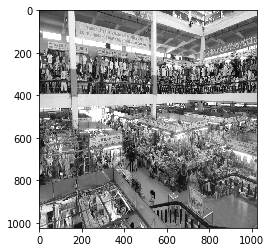

In [23]:
filenames = sorted(os.listdir('DIV2K_train_HR'))

block_size = 32
stride = 16
row_num = (1024 - block_size) // stride + 1
col_num = (1024 - block_size) // stride + 1


img = cv2.resize(cv2.imread('DIV2K_train_HR/'+filenames[777], 0),(1024,1024))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap = 'gray')

In [24]:
compressed_files = sorted(os.listdir('compressed_new'))

block_size = 32
stride = 16

In [25]:
test_sample = cv2.resize(cv2.imread('compressed_new/'+compressed_files[777],0),(1024,1024))
# plt.imshow(test_sample)
row_num = (test_sample.shape[0] - block_size) // stride + 1
col_num = (test_sample.shape[1] - block_size) // stride + 1

print(row_num)
print(col_num)

test_data = [None]*row_num
for y in range(row_num):
    test = []
    for x in range(col_num):
        x_start = x*stride
        x_end = x_start+block_size
        y_start = y*stride
        y_end = y_start+block_size
        block = test_sample[y_start:y_end, x_start:x_end]
        test.append(loaded_model.predict(block.reshape(1,32,32,1)))
    test_data[y] = test
len(test_data)

63
63


63

In [26]:
print(row_num, col_num)
test_data = np.array(test_data)

63 63


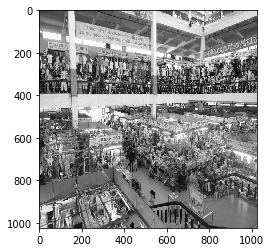

In [27]:
recon = np.ones((test_sample.shape[0],test_sample.shape[1],1))
test_data = np.array(test_data)
for i, row in enumerate(test_data):
    for j, col in enumerate(row):
        if i%2 == 0 and j%2 == 0:
            recon[(i*16):(i*16)+32, (j*16):(j*16)+32] = row[j]

for i, row in enumerate(test_data):
    for j, col in enumerate(row):
        if i%2 == 0 and j%2 == 0:
            recon[(i*16):(i*16)+32, (j*16):(j*16)+32] = (recon[(i*16):(i*16)+32, (j*16):(j*16)+32]
                                                                                        + row[j])/2

# for i, row in enumerate(test_data):
#     for j, col in enumerate(row):
#         recon[i*16:(i*16)+32, j*16:(j*16)+32] = row[j]

plt.imshow(recon.reshape(test_sample.shape[0],test_sample.shape[1]), cmap = 'gray') 

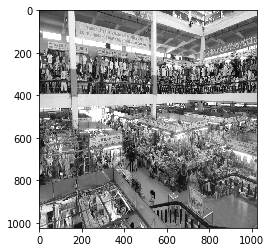

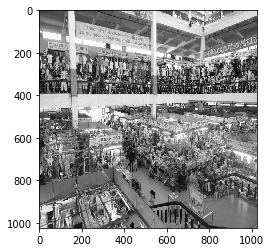

MSE:  35.36957263946533
MSE:  41.330594062805176


In [28]:
# y = cv2.resize(cv2.imread('DIV2K_train_HR/'+filenames[5],0),(1024,1024))
# recon.shape
x = cv2.resize(cv2.imread('compressed_new/'+compressed_files[777],0),(1024,1024))

# plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.show()
# plt.subplot(122)
plt.imshow(recon[:,:,0], cmap = 'gray')
plt.show()
recon = np.array(recon)
err = np.sum((recon.astype("int") - img.reshape(img.shape[0],img.shape[1],1).astype("int")) ** 2)
err /= float(recon.shape[0] * recon.shape[1])
print("MSE: ",err)
err1 = np.sum((x.astype("int") - img.reshape(img.shape[0],img.shape[1]).astype("int")) ** 2)
err1 /= float(recon.shape[0] * recon.shape[1])
print("MSE: ",err1)

In [29]:
import math
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

print(psnr(recon, img.reshape(img.shape[0],img.shape[1],1)))
print(psnr(x, img.reshape(img.shape[0],img.shape[1])))

32.723878813573265
33.3396288817712
